# Reduction in operations for union-of-stars using sparsification and decomposition

Corresponds to Figures 3, 4, 5, 6, 11, and 12 in the paper.

This notebook plots the reduction in the number of HIsing pulses, total number of operations (HIsing pulses and bit flips), and total time of HIsing pulses using sparse union-of-stars (i.e., using sparsification and decomposition techniques) as compared to classical union-of-stars algorithm for graphs in the MQLib library.

All positive weighted graphs in MQLib with number of vertices $50 \leq n < 200$ and number of edges $2n \leq m < 2000$ were chosen for this experiment. The data for the plots is stored in folder `data/MQLib_experiment_results` and was generated using the script `mqlib-instances.ipynb` in the `notebooks` folder.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.colors import TwoSlopeNorm


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titleweight": "bold",
    "figure.dpi": 200,
})


In [20]:
# Set figure parameters
linewidths = 0.0
edgecolors = 'black'
markersize = 4
legendmarkersize = 30
axis_label_fontsize = 20
title_fontsize = 24
legend_fontsize = 20

In [21]:
# Read all files in the results directory
files = os.listdir('../data/MQLib_experiment_results/')
files = [f for f in files if f.endswith('.csv')]

df = pd.read_csv('../data/MQLib_experiment_results/' + files[0])
original_pulses = df[df['type'] == 'Original']['number_of_pulses'].values[0]
original_length = df[df['type'] == 'Original']['length_of_pulses'].values[0]
original_operations = (
        df[df['type'] == 'Original']['number_of_pulses'].values[0] +
        df[df['type'] == 'Original']['number_of_bit_flips'].values[0]
)
df['Frac pulses'] = df['number_of_pulses'] / original_pulses
df['Frac length'] = df['length_of_pulses'] / original_length
df['Frac operations'] = (df['number_of_pulses'] + df['number_of_bit_flips'])/ original_operations

for t in range(1, len(files)):
    df_instance = pd.read_csv('../data/MQLib_experiment_results/' + files[t])
    original_pulses = df_instance[df_instance['type'] == 'Original']['number_of_pulses'].values[0]
    original_length = df_instance[df_instance['type'] == 'Original']['length_of_pulses'].values[0]
    original_operations = (
        df_instance[df_instance['type'] == 'Original']['number_of_pulses'].values[0] +
        df_instance[df_instance['type'] == 'Original']['number_of_bit_flips'].values[0]
    )
    df_instance['Frac pulses'] = df_instance['number_of_pulses'] / original_pulses
    df_instance['Frac length'] = df_instance['length_of_pulses'] / original_length
    df_instance['Frac operations'] = (df_instance['number_of_pulses'] + df_instance['number_of_bit_flips'] )/ original_operations

    df = pd.concat([df, df_instance], ignore_index=True)
    
    
# Filter by number of vertices
df = df[(df['number_of_vertices'] >= 50) & (df['number_of_vertices'] < 200)]
# Filter by number of edges
df = df[(df['number_of_edges'] >= 2 * df['number_of_vertices']) & (df['number_of_edges'] < 2000)]

df = df[df['type'] != 'Original']
print(len(df['instance_name'].unique()))

194


In [22]:
df_bin = df[df['decomposition_type'] == 'binary']
df_exp = df[df['decomposition_type'] == 'exponential']

# Reduction in total number of operations

## Exponential decomposition

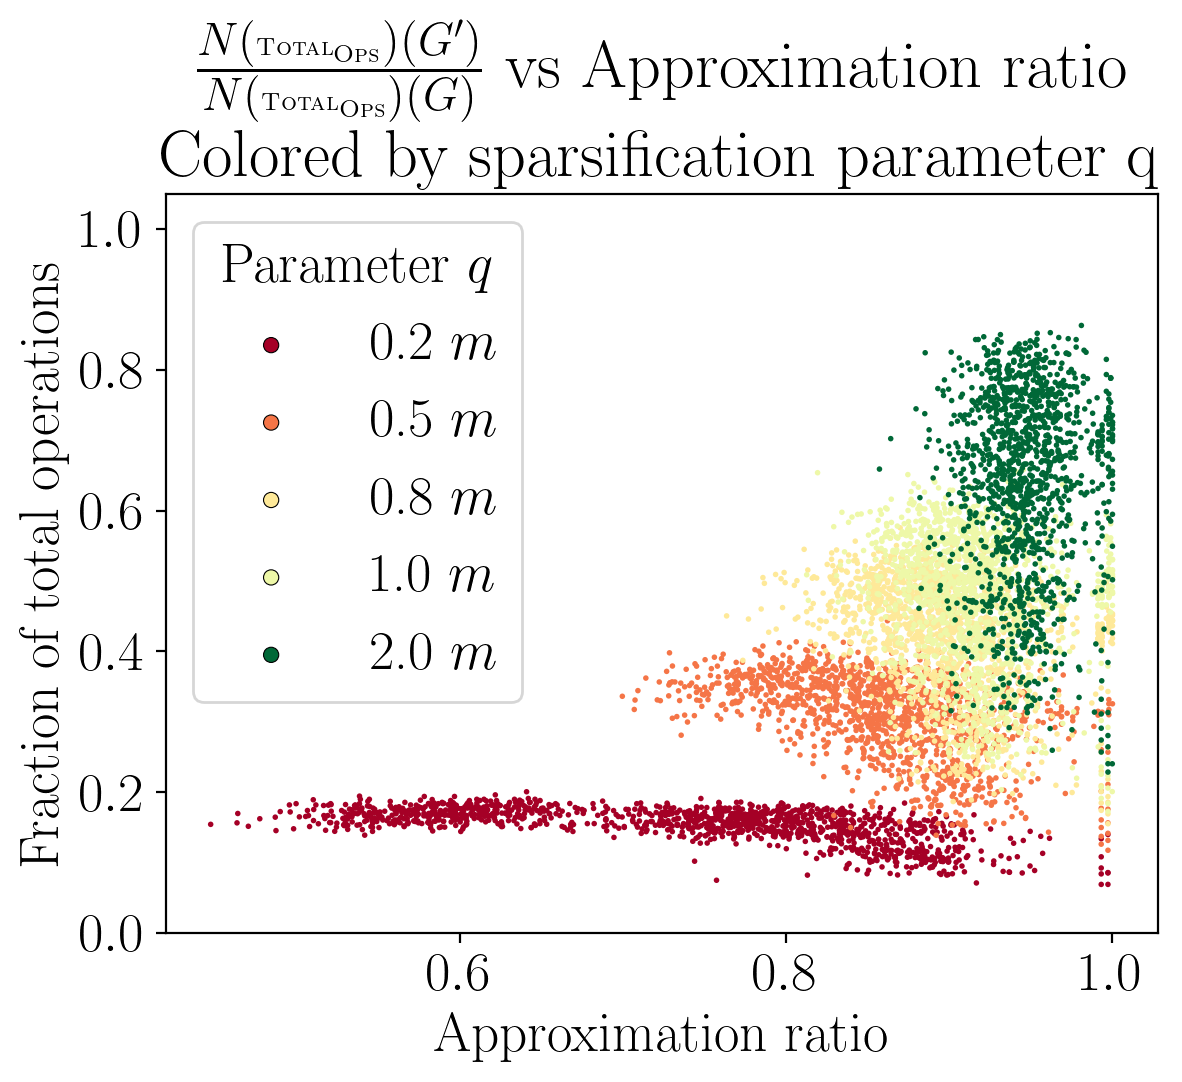

In [23]:
fig, ax = plt.subplots()

vmin, vmax = df['q_sparsification'].min(), df['q_sparsification'].max()

norm = TwoSlopeNorm(vmin=0.2, vcenter=0.9, vmax=2.0)

for key, grp in df_exp.groupby(['q_sparsification']):
    ax.scatter(grp['max_cut_approximation'], grp['Frac operations'], label=key[0], s=markersize, linewidths=linewidths, edgecolors=edgecolors,
               c=grp['q_sparsification'], cmap='RdYlGn', norm=norm)

ax.set_xlabel('Approximation ratio', fontsize=axis_label_fontsize)
ax.tick_params(axis='x', labelsize=axis_label_fontsize)

ax.set_ylabel('Fraction of total operations', fontsize=axis_label_fontsize)
ax.tick_params(axis='y', labelsize=axis_label_fontsize)

ax.set_ylim([0.0, 1.05])

ax.set_title(r"$\frac{N(\textsc{\small Total}_{\textsc{\small Ops}})(G')}{N(\textsc{\small Total}_{\textsc{\small Ops}})(G)}$ vs Approximation ratio" + "\nColored by sparsification parameter q", fontsize=title_fontsize)

# Create legend and store the reference
legend = plt.legend(title=r'Parameter $q$', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Modify legend text
for text in legend.get_texts():
    text.set_text(text.get_text() + r" $m$")

# Increase marker size in the legend (scatter plot fix)
for handle in legend.legend_handles:
    handle.set_sizes([30])
    handle.set_linewidths([0.4])


plt.savefig('plots/frac_total_ops_vs_approximation_sparsification.png', bbox_inches='tight')

plt.show()


## Binary decomposition

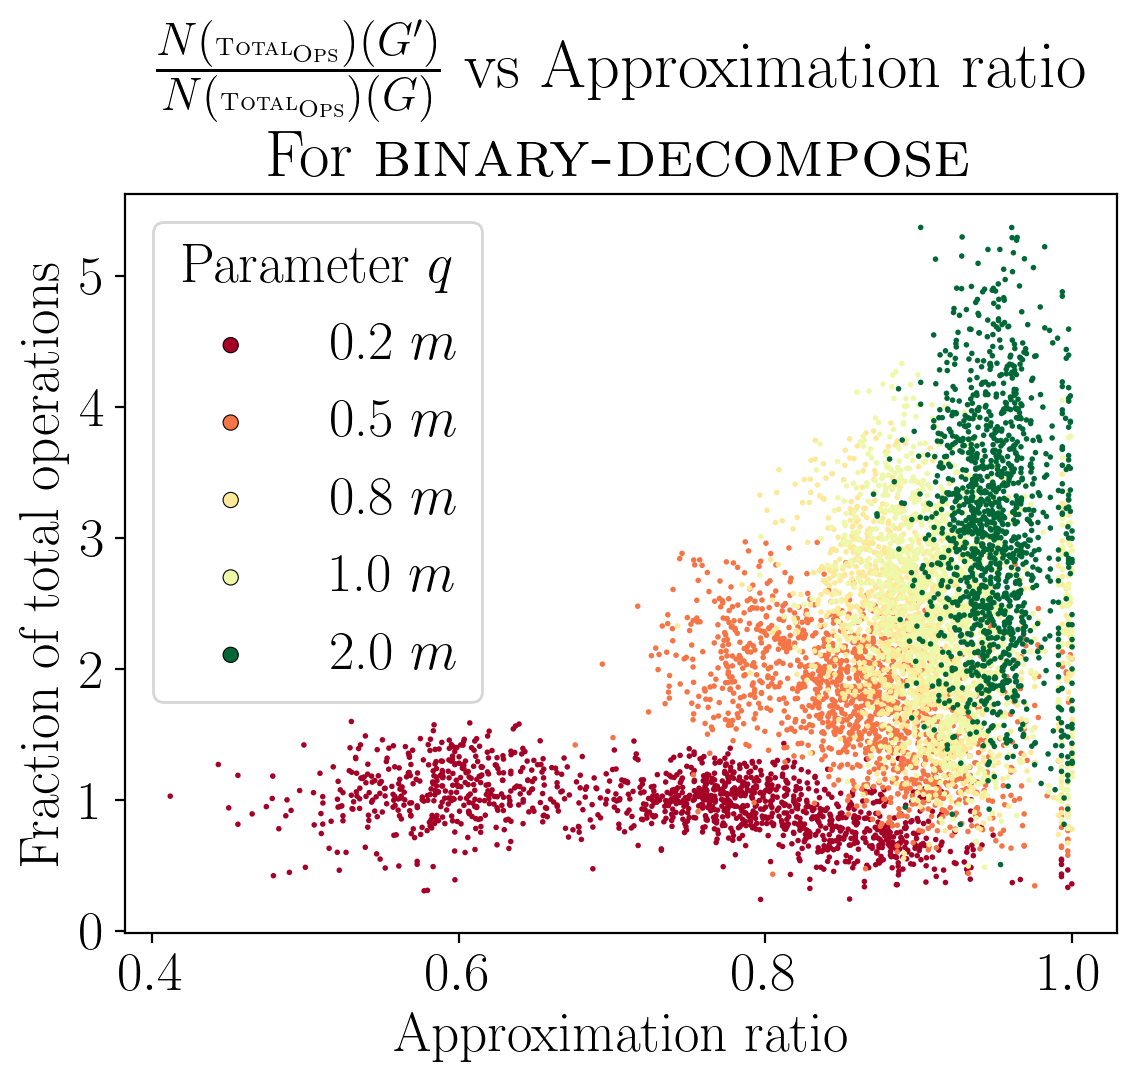

In [24]:
fig, ax = plt.subplots()

vmin, vmax = df['q_sparsification'].min(), df['q_sparsification'].max()

norm = TwoSlopeNorm(vmin=0.2, vcenter=0.9, vmax=2.0)

for key, grp in df_bin.groupby(['q_sparsification']):
    ax.scatter(grp['max_cut_approximation'], grp['Frac operations'], label=key[0], s=markersize, linewidths=linewidths, edgecolors=edgecolors,
               c=grp['q_sparsification'], cmap='RdYlGn', norm=norm)

ax.set_xlabel('Approximation ratio', fontsize=axis_label_fontsize)
ax.tick_params(axis='x', labelsize=axis_label_fontsize)

ax.set_ylabel('Fraction of total operations', fontsize=axis_label_fontsize)
ax.tick_params(axis='y', labelsize=axis_label_fontsize)

ax.set_title(r"$\frac{N(\textsc{\small Total}_{\textsc{\small Ops}})(G')}{N(\textsc{\small Total}_{\textsc{\small Ops}})(G)}$ vs Approximation ratio" + "\n" + r"For {\sc binary-decompose}", fontsize=title_fontsize)

# Create legend and store the reference
legend = plt.legend(title=r'Parameter $q$', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Modify legend text
for text in legend.get_texts():
    text.set_text(text.get_text() + r" $m$")

# Increase marker size in the legend (scatter plot fix)
for handle in legend.legend_handles:
    handle.set_sizes([30])
    handle.set_linewidths([0.4])
    

plt.savefig('plots/frac_total_ops_vs_approximation_sparsification_binary.png', bbox_inches='tight')

plt.show()


# Reduction in the number of pulses

## Exponential decomposition

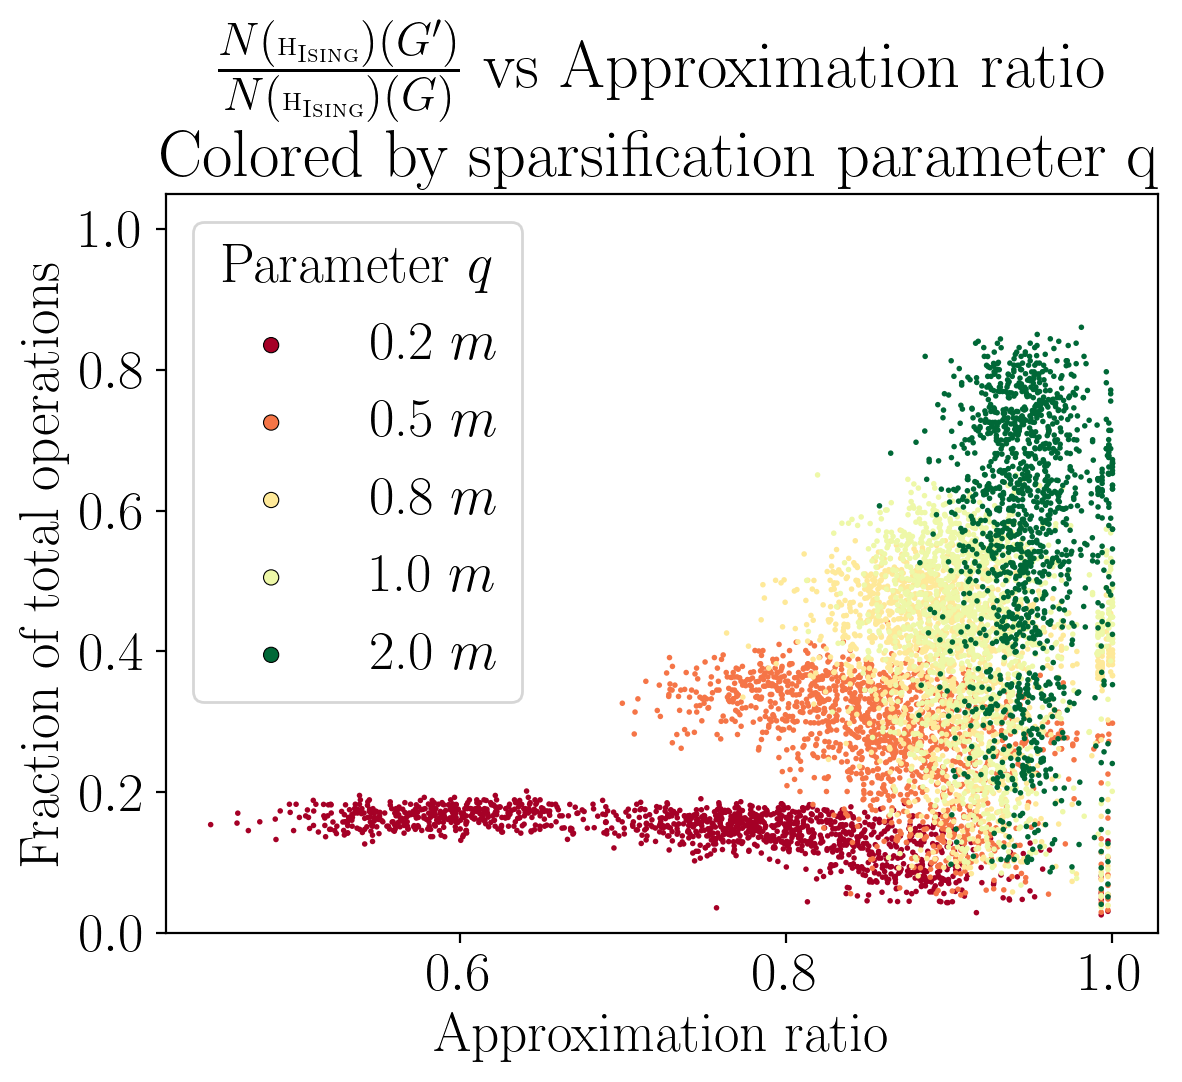

In [25]:
fig, ax = plt.subplots()

vmin, vmax = df['q_sparsification'].min(), df['q_sparsification'].max()

norm = TwoSlopeNorm(vmin=0.2, vcenter=0.9, vmax=2.0)

for key, grp in df_exp.groupby(['q_sparsification']):
    ax.scatter(grp['max_cut_approximation'], grp['Frac pulses'], label=key[0], s=markersize, linewidths=linewidths, edgecolors=edgecolors,
               c=grp['q_sparsification'], cmap='RdYlGn', norm=norm)

ax.set_xlabel('Approximation ratio', fontsize=axis_label_fontsize)
ax.tick_params(axis='x', labelsize=axis_label_fontsize)

ax.set_ylabel('Fraction of total operations', fontsize=axis_label_fontsize)
ax.tick_params(axis='y', labelsize=axis_label_fontsize)

ax.set_ylim([0.0, 1.05])

ax.set_title(r"$\frac{N(\textsc{\small H}_{\textsc{\small Ising}})(G')}{N(\textsc{\small H}_{\textsc{\small Ising}})(G)}$ vs Approximation ratio" + "\nColored by sparsification parameter q", fontsize=title_fontsize)

# Create legend and store the reference
legend = plt.legend(title=r'Parameter $q$', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Modify legend text
for text in legend.get_texts():
    text.set_text(text.get_text() + r" $m$")

# Increase marker size in the legend (scatter plot fix)
for handle in legend.legend_handles:
    handle.set_sizes([30])
    handle.set_linewidths([0.4])


plt.savefig('plots/frac_pulses_vs_approximation_sparsification.png', bbox_inches='tight')

plt.show()


## Binary decomposition

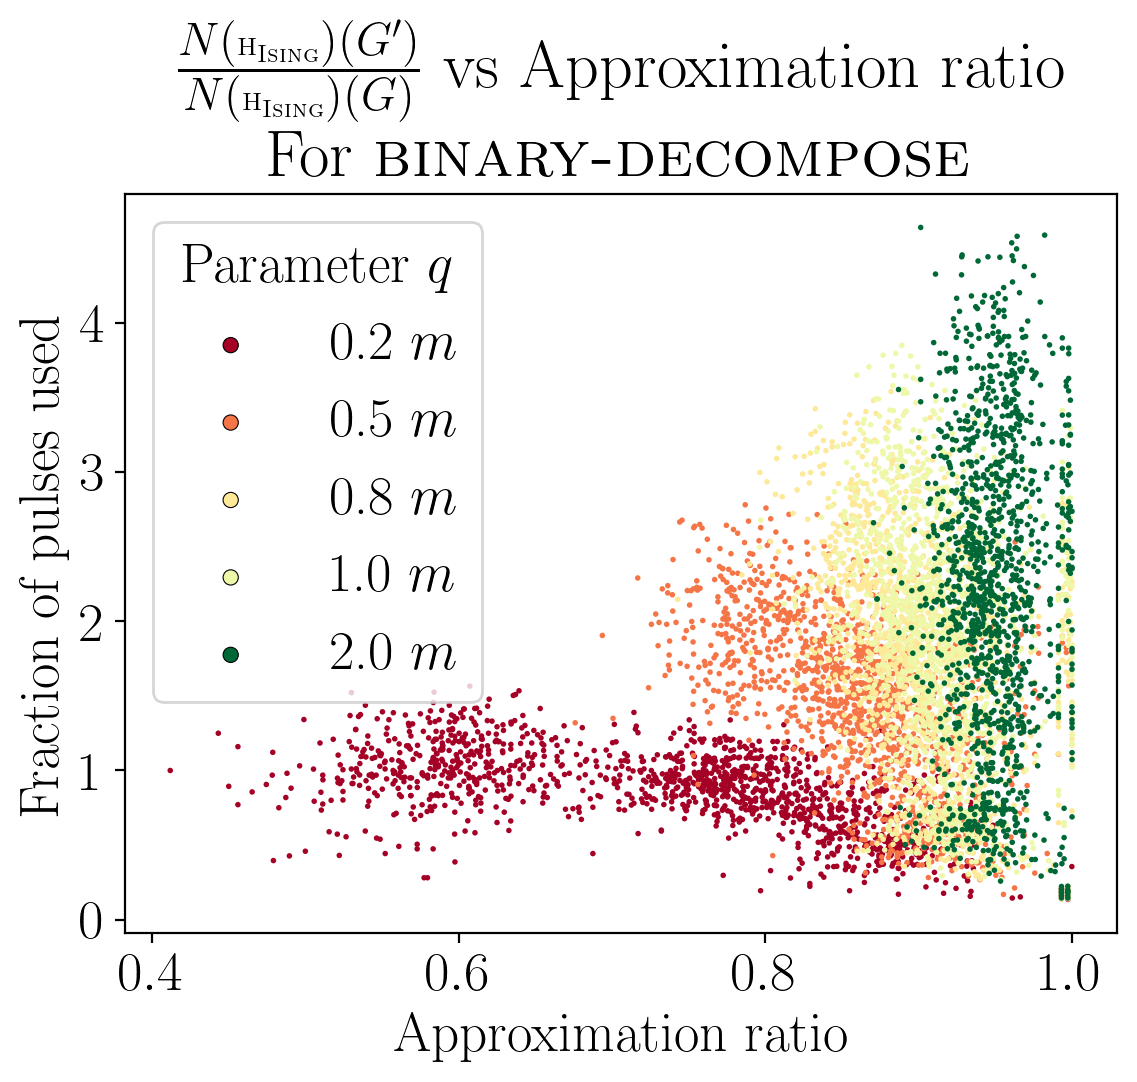

In [26]:
fig, ax = plt.subplots()

vmin, vmax = df['q_sparsification'].min(), df['q_sparsification'].max()

norm = TwoSlopeNorm(vmin=0.2, vcenter=0.9, vmax=2.0)

for key, grp in df_bin.groupby(['q_sparsification']):
    ax.scatter(grp['max_cut_approximation'], grp['Frac pulses'], label=key[0], s=markersize, linewidths=linewidths, edgecolors=edgecolors,
               c=grp['q_sparsification'], cmap='RdYlGn', norm=norm)

ax.set_xlabel('Approximation ratio', fontsize=axis_label_fontsize)
ax.tick_params(axis='x', labelsize=axis_label_fontsize)

ax.set_ylabel('Fraction of pulses used', fontsize=axis_label_fontsize)
ax.tick_params(axis='y', labelsize=axis_label_fontsize)

ax.set_title(r"$\frac{N(\textsc{\small H}_{\textsc{\small Ising}})(G')}{N(\textsc{\small H}_{\textsc{\small Ising}})(G)}$ vs Approximation ratio" + "\n" + r"For {\sc binary-decompose}", fontsize=title_fontsize)

# Create legend and store the reference
legend = plt.legend(title=r'Parameter $q$', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Modify legend text
for text in legend.get_texts():
    text.set_text(text.get_text() + r" $m$")

# Increase marker size in the legend (scatter plot fix)
for handle in legend.legend_handles:
    handle.set_sizes([30])
    handle.set_linewidths([0.4])
    
plt.savefig('plots/frac_pulses_vs_approximation_sparsification_binary.png', bbox_inches='tight')

plt.show()


# Time of pulses

## Exponential decomposition

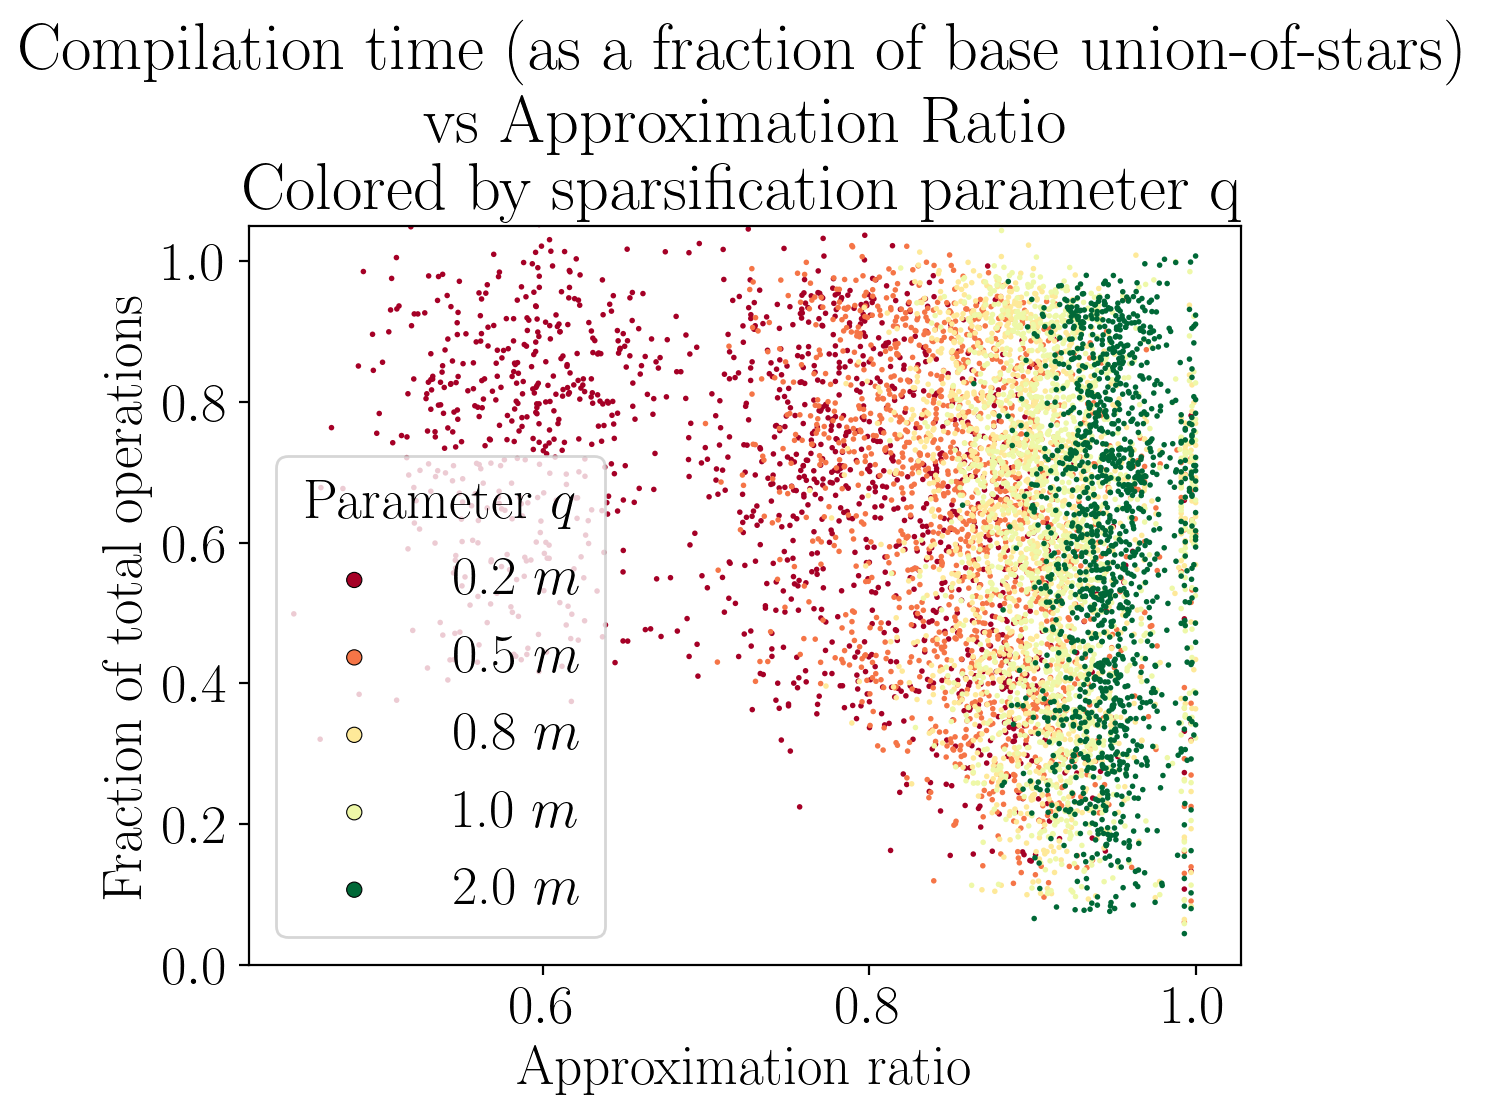

In [27]:
fig, ax = plt.subplots()

vmin, vmax = df['q_sparsification'].min(), df['q_sparsification'].max()

norm = TwoSlopeNorm(vmin=0.2, vcenter=0.9, vmax=2.0)

for key, grp in df_exp.groupby(['q_sparsification']):
    ax.scatter(grp['max_cut_approximation'], grp['Frac length'], label=key[0], s=markersize, linewidths=linewidths, edgecolors=edgecolors,
               c=grp['q_sparsification'], cmap='RdYlGn', norm=norm)

ax.set_xlabel('Approximation ratio', fontsize=axis_label_fontsize)
ax.tick_params(axis='x', labelsize=axis_label_fontsize)

ax.set_ylabel('Fraction of total operations', fontsize=axis_label_fontsize)
ax.tick_params(axis='y', labelsize=axis_label_fontsize)

ax.set_ylim([0.0, 1.05])

ax.set_title("Compilation time (as a fraction of base union-of-stars)\nvs Approximation Ratio\nColored by sparsification parameter q", fontsize=title_fontsize)

# Create legend and store the reference
legend = plt.legend(title=r'Parameter $q$', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Modify legend text
for text in legend.get_texts():
    text.set_text(text.get_text() + r" $m$")

# Increase marker size in the legend (scatter plot fix)
for handle in legend.legend_handles:
    handle.set_sizes([30])
    handle.set_linewidths([0.4])
    
plt.savefig('plots/frac_length_of_pulses_vs_approximation_sparsification.png', bbox_inches='tight')

plt.show()


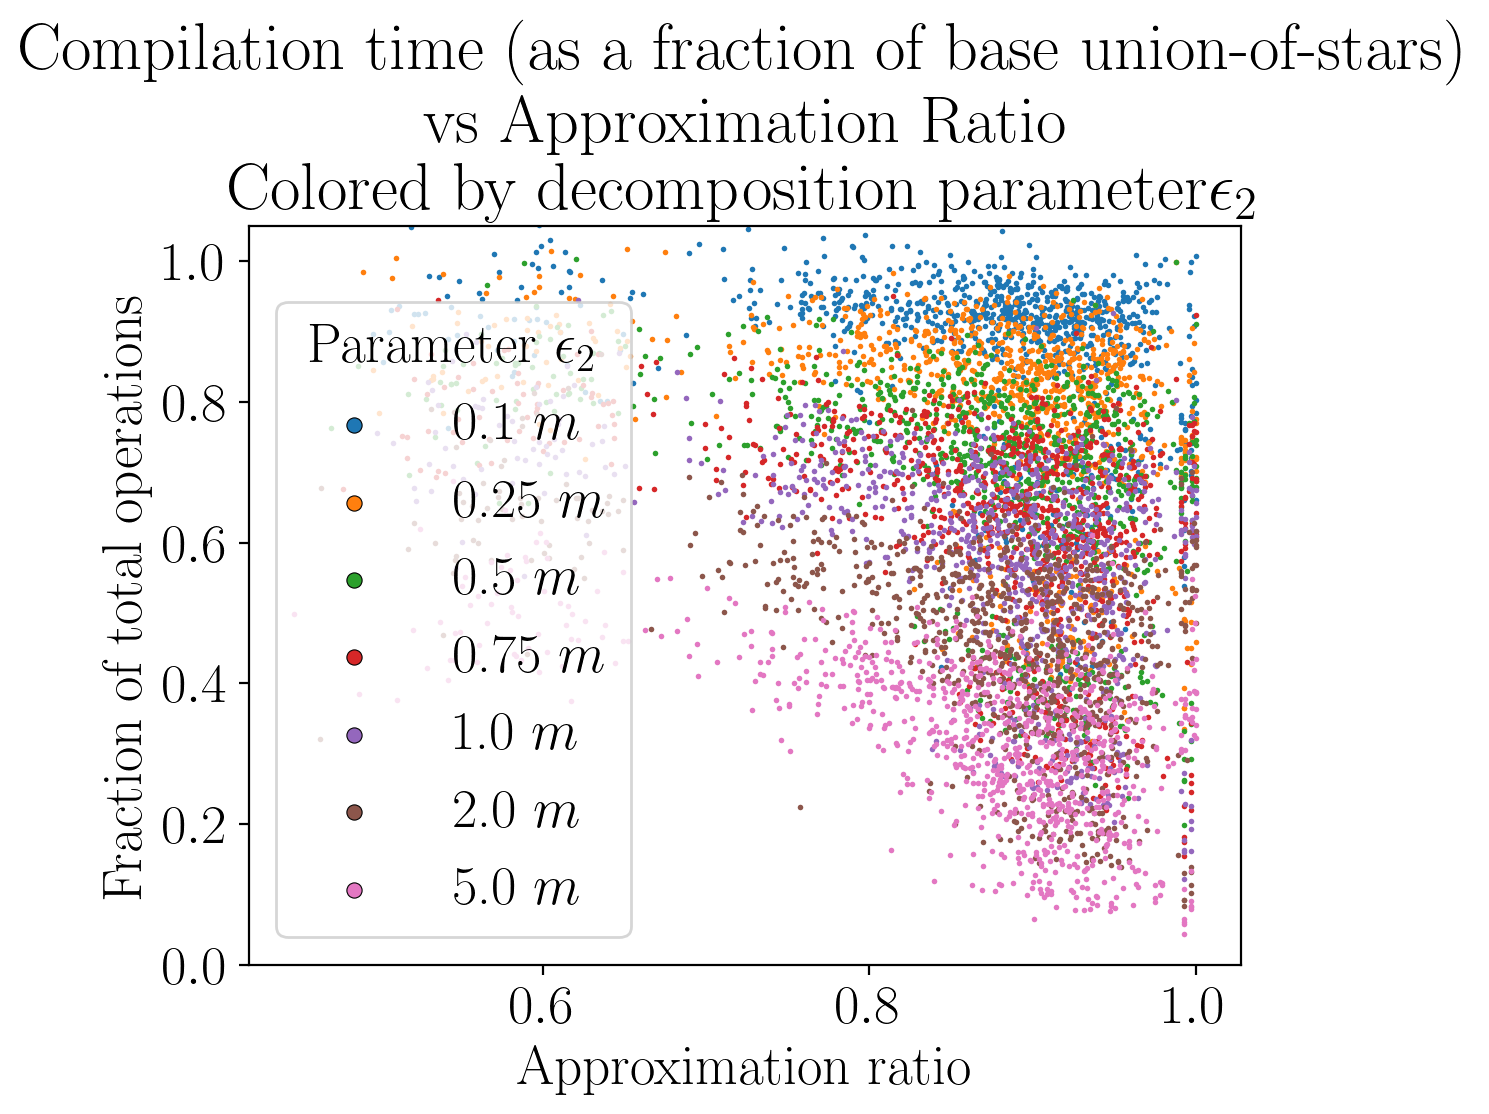

In [28]:
fig, ax = plt.subplots()

vmin, vmax = df['epsilon_decomposition'].min(), df['epsilon_decomposition'].max()

for key, grp in df_exp.groupby(['epsilon_decomposition']):
    ax.scatter(grp['max_cut_approximation'], grp['Frac length'], label=key[0], s=markersize, linewidths=linewidths, edgecolors=edgecolors)

ax.set_xlabel('Approximation ratio', fontsize=axis_label_fontsize)
ax.tick_params(axis='x', labelsize=axis_label_fontsize)

ax.set_ylabel('Fraction of total operations', fontsize=axis_label_fontsize)
ax.tick_params(axis='y', labelsize=axis_label_fontsize)

ax.set_ylim([0.0, 1.05])

ax.set_title(r"Compilation time (as a fraction of base union-of-stars)" + "\nvs Approximation Ratio\nColored by decomposition parameter" + r"$\epsilon_2$", fontsize=title_fontsize)

# Create legend and store the reference
legend = plt.legend(title=r'Parameter $\epsilon_2$', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Modify legend text
for text in legend.get_texts():
    text.set_text(text.get_text() + r" $m$")

# Increase marker size in the legend (scatter plot fix)
for handle in legend.legend_handles:
    handle.set_sizes([30])
    handle.set_linewidths([0.4])
    
plt.savefig('plots/frac_length_of_pulses_vs_approximation_decomposition.png', bbox_inches='tight')

plt.show()
